In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [18]:
# Load the data
df = pd.read_csv('/kaggle/input/ifeval-scores/IFEval_Scores.csv')
print(df)

                                  Accuracy Scores  FLANT5-small-baseline  \
0                                    prompt-level               0.099815   
1                              instruction-level:               0.203837   
2                                     change_case               0.123596   
3                                     combination               0.015385   
4                              detectable_content               0.075472   
5                               detectable_format               0.019108   
6                                        keywords               0.257669   
7                                        language               0.096774   
8                              length_constraints               0.363636   
9                                     punctuation               0.742424   
10                                       startend               0.074627   
11             change_case:capital_word_frequency               0.280000   
12          

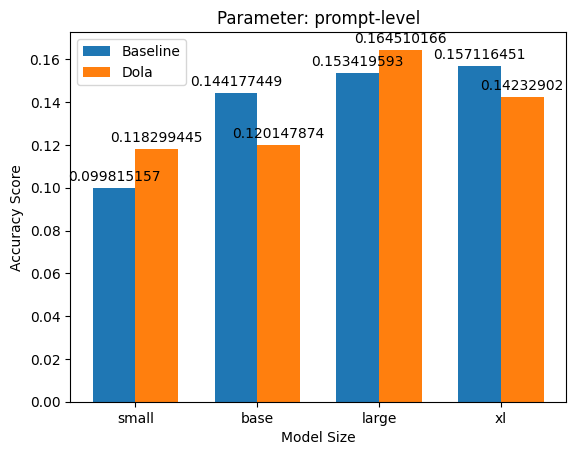

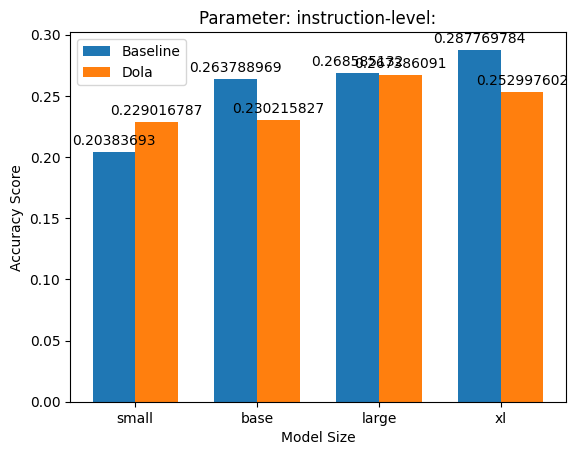

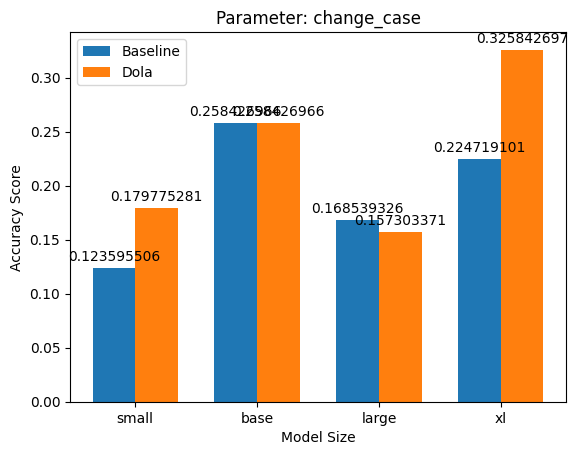

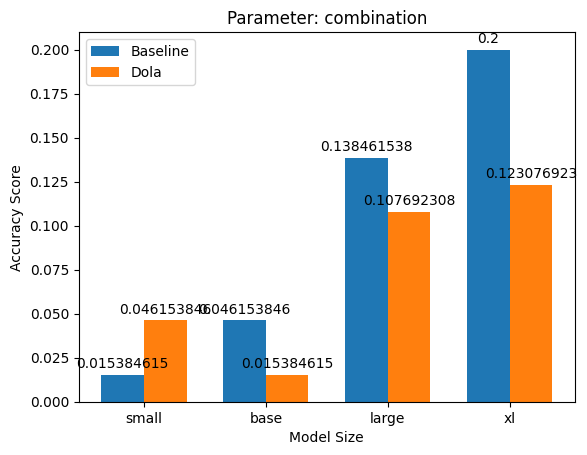

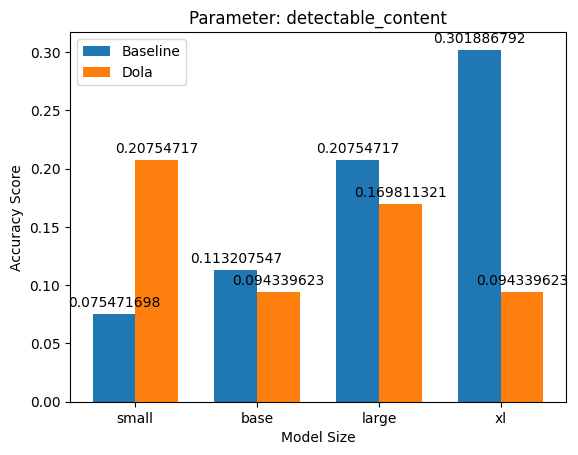

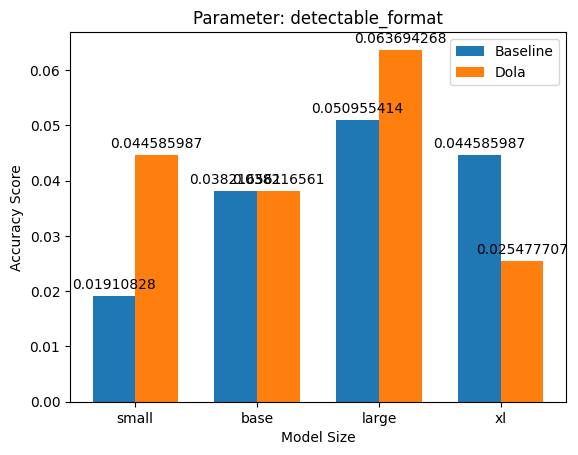

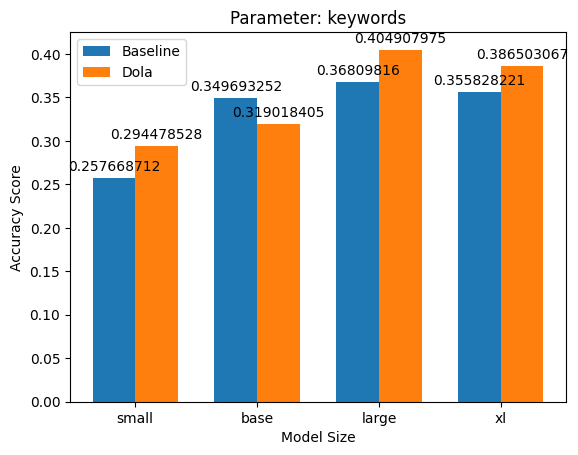

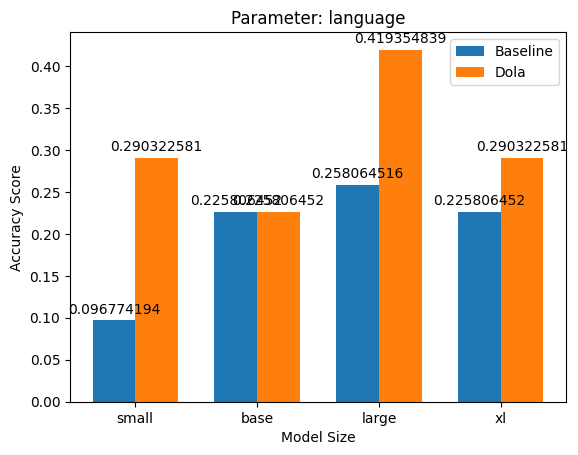

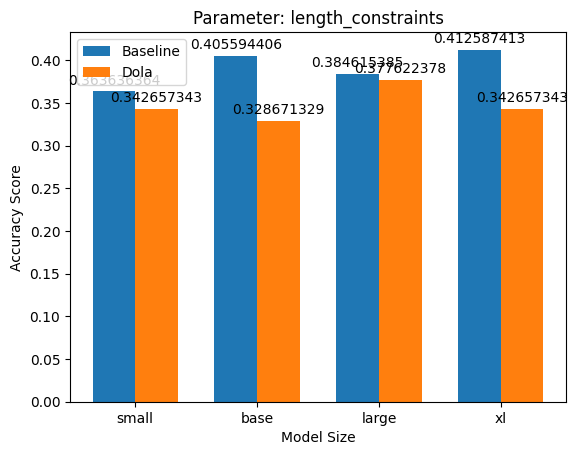

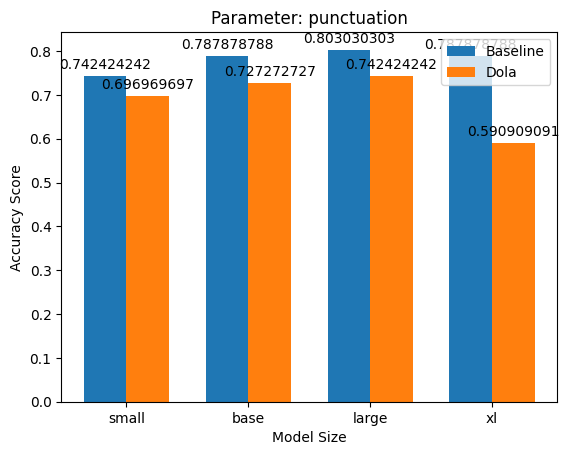

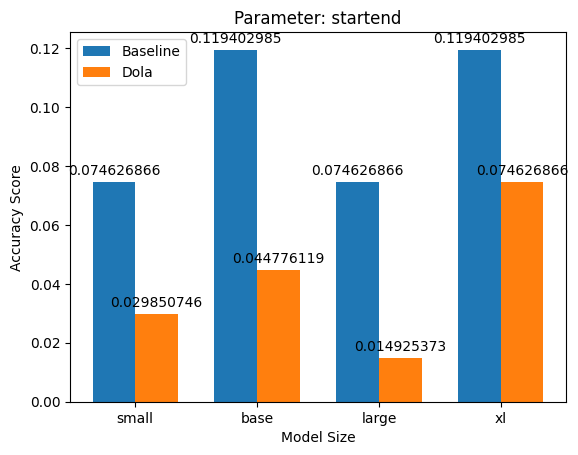

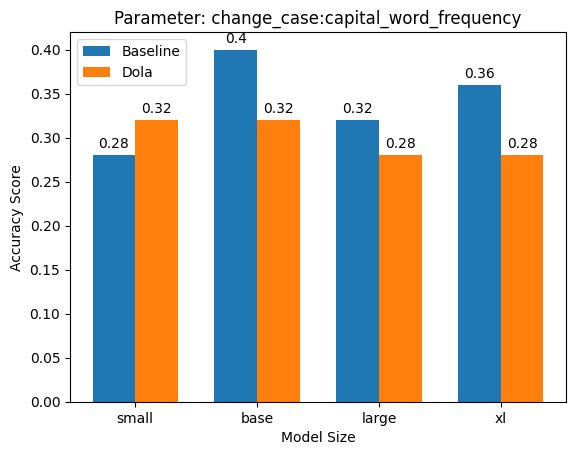

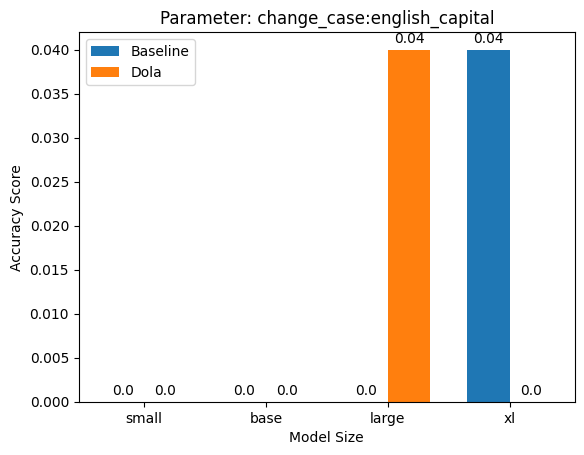

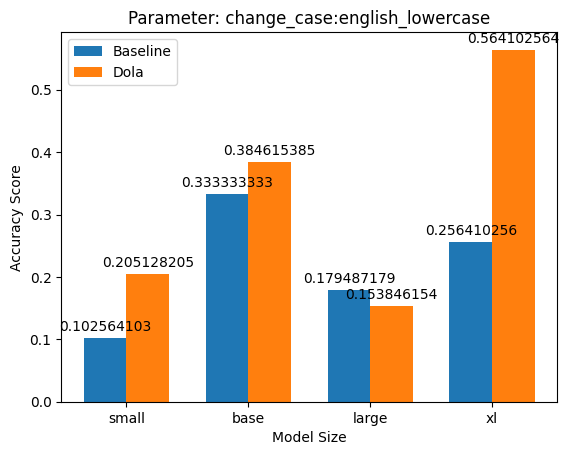

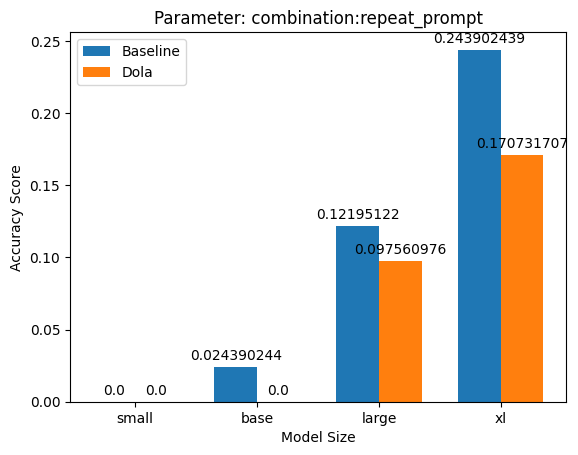

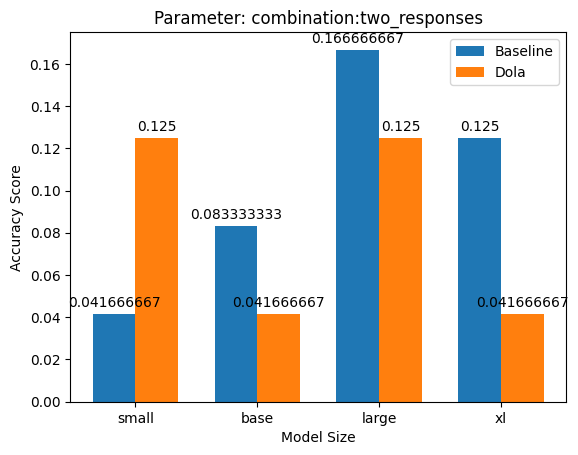

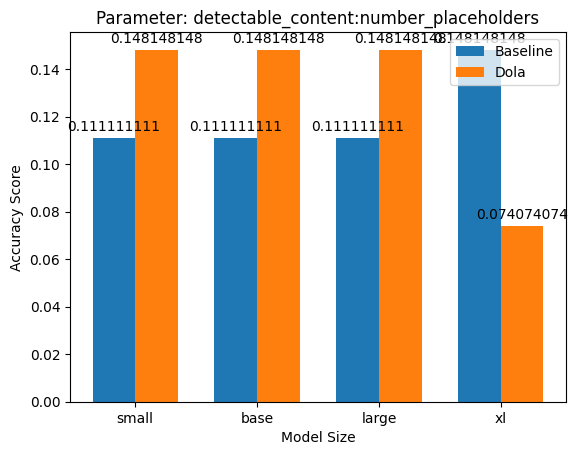

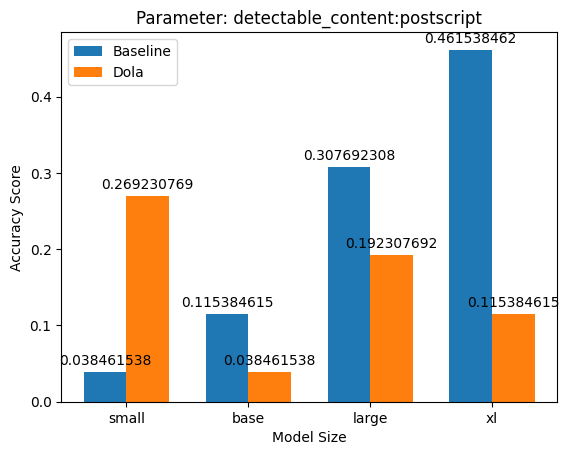

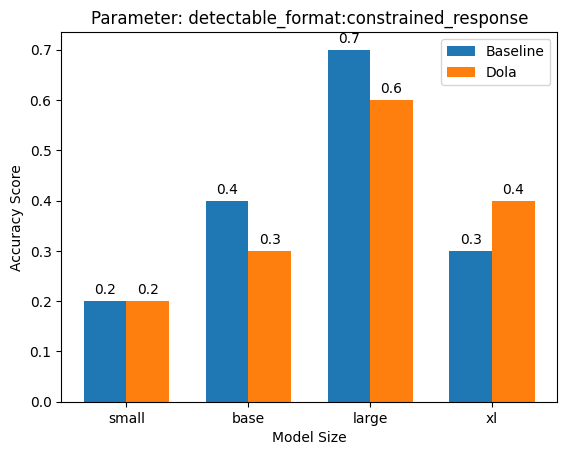

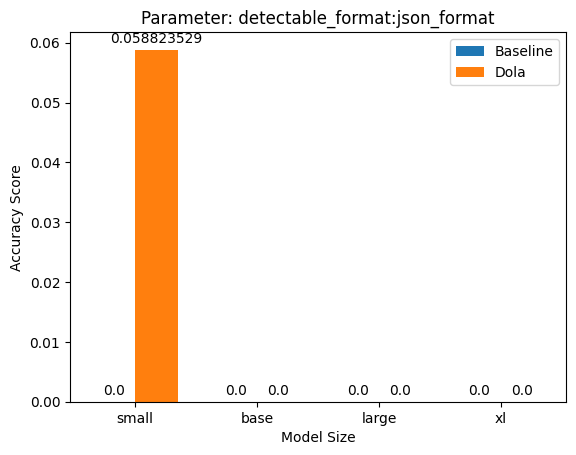

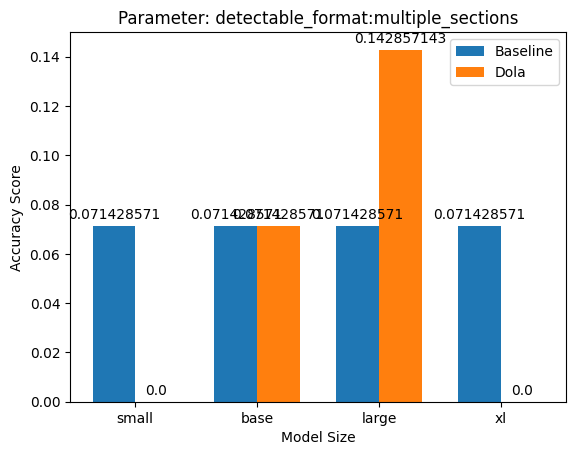

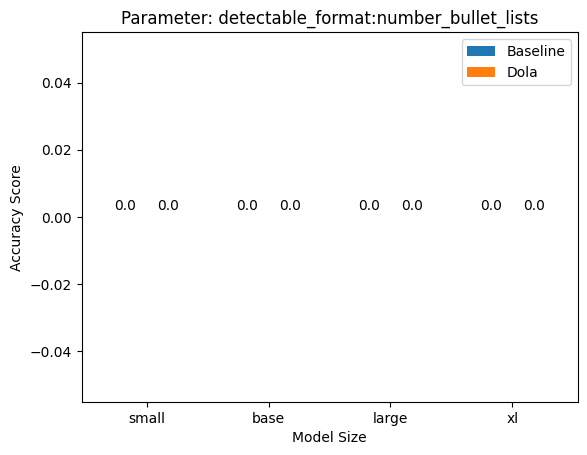

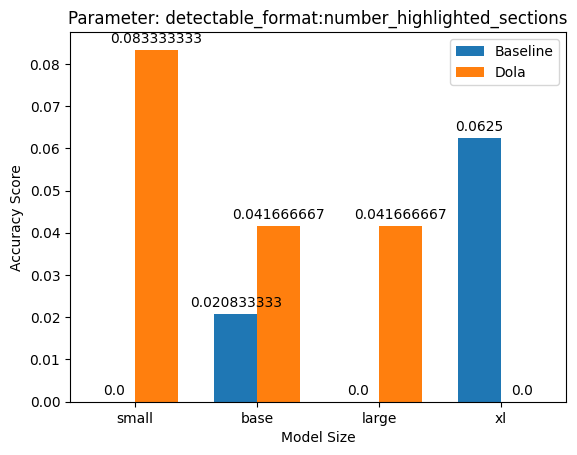

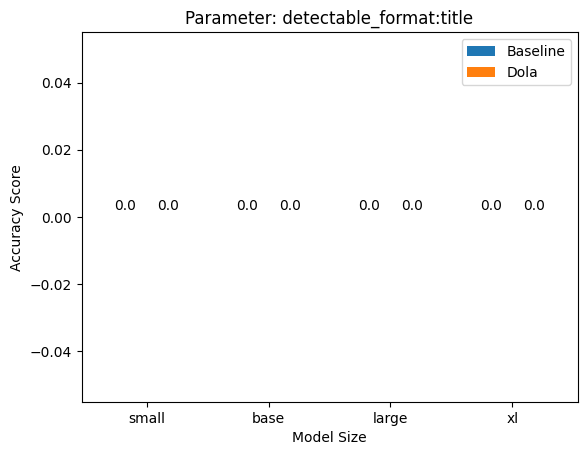

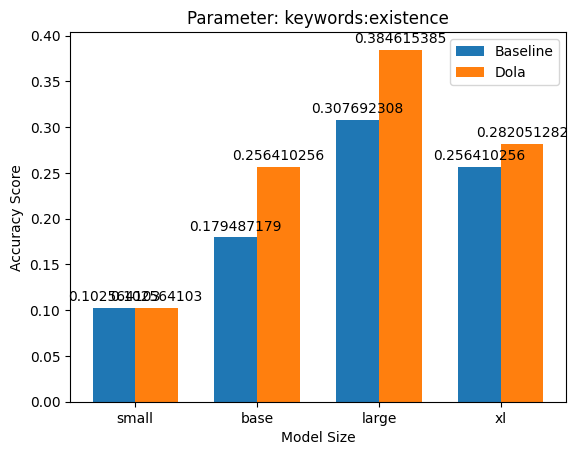

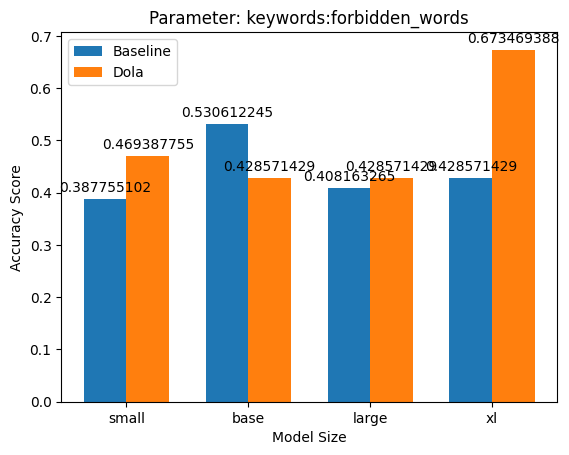

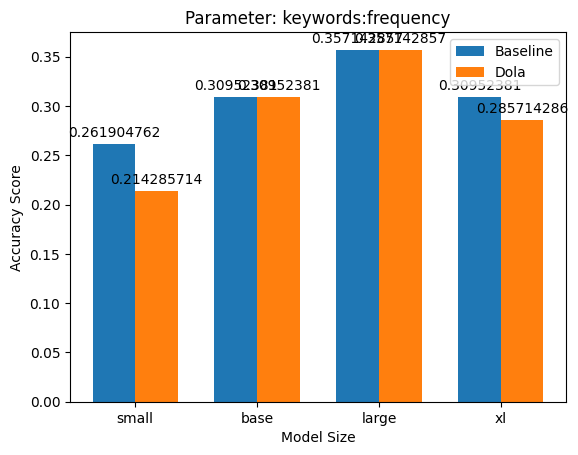

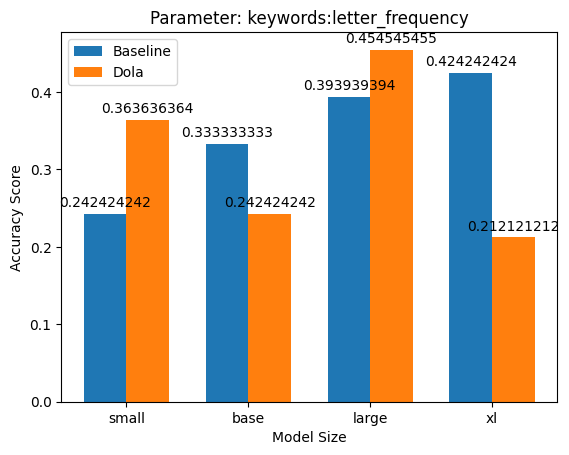

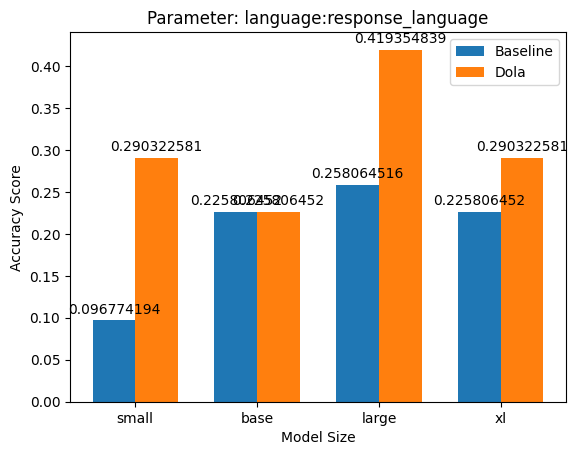

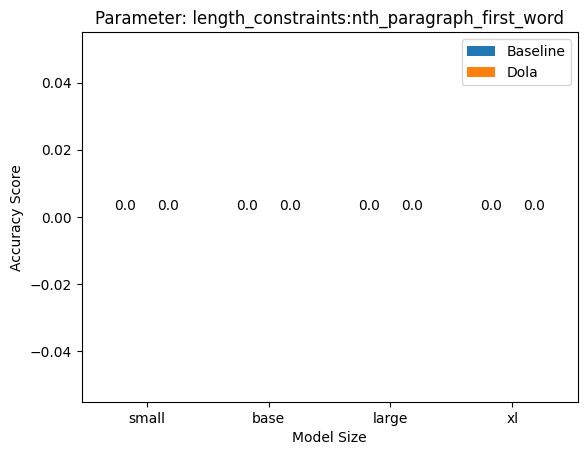

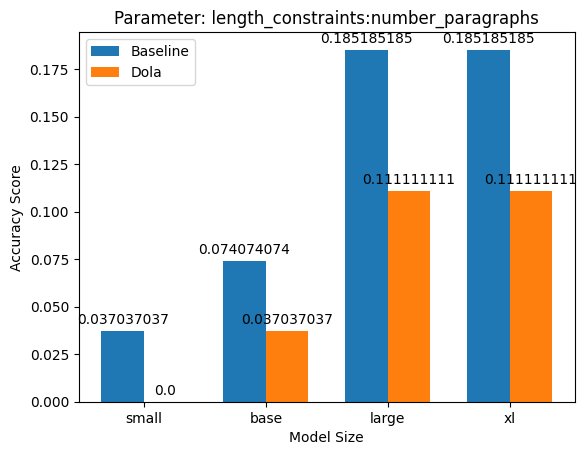

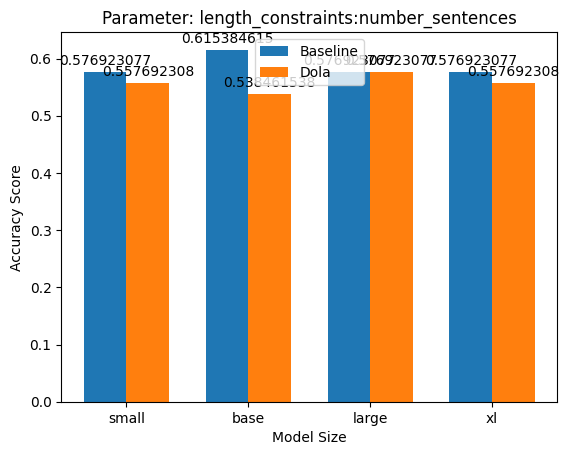

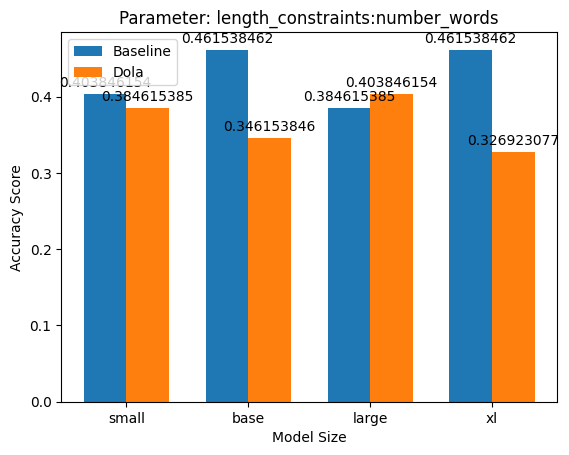

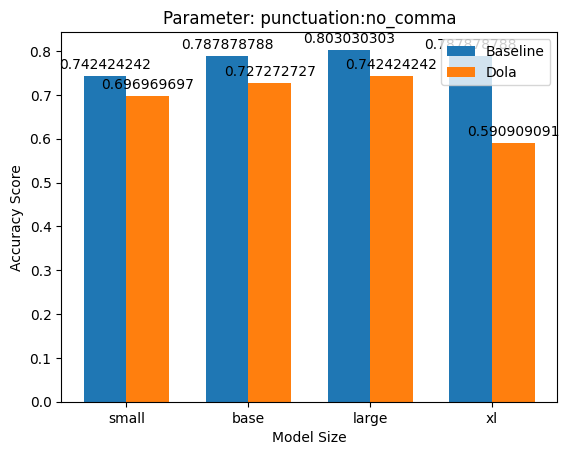

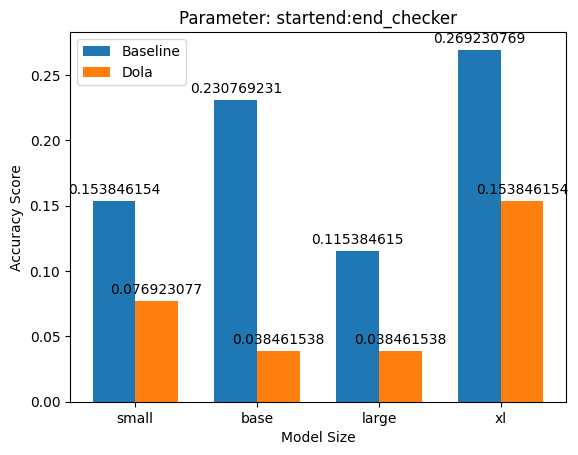

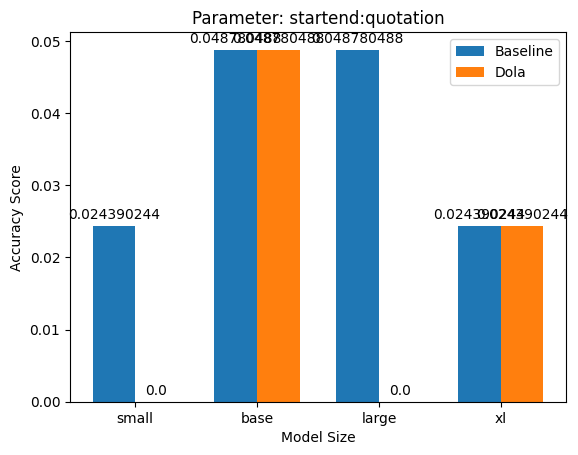

In [23]:
# Load the data
df = pd.read_csv('/kaggle/input/ifeval-scores/IFEval_Scores.csv')

# Define model sizes and types for plotting
model_sizes = ['small', 'base', 'large', 'xl']
model_types = ['baseline', 'DOLA']

# Iterate through each row (parameter) in the DataFrame to generate plots
for index, row in df.iterrows():
    # Prepare data for plotting
    scores = {
        'Model Size': [],
        'Score': [],
        'Type': []
    }
    for size in model_sizes:
        for type in model_types:
            baseline_col = f'FLANT5-{size}-{type}'
            scores['Model Size'].append(size)  # Add model size
            scores['Score'].append(row[baseline_col])  # Add score
            scores['Type'].append(type)  # Add model type (Baseline or DOLA)
    
    # Convert to DataFrame for easy plotting
    plot_df = pd.DataFrame(scores)

    # Plotting
    fig, ax = plt.subplots()
    bar_width = 0.35
    index = range(len(model_sizes))

    for i, type in enumerate(model_types):
        subset = plot_df[plot_df['Type'] == type]
        bars = ax.bar([x + i * bar_width for x in index], subset['Score'], bar_width, label=type.capitalize())

        # Add labels to each bar
        for bar in bars:
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # Customization
    ax.set_xlabel('Model Size')
    ax.set_ylabel('Accuracy Score')
    ax.set_title(f'Parameter: {row["Accuracy Scores"]}')
    ax.set_xticks([x + bar_width / 2 for x in index])
    ax.set_xticklabels(model_sizes)
    ax.legend()

    # Save the plot
    plt.savefig(f'{row["Accuracy Scores"]}.png')
    plt.show()